In [50]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, array_to_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
image=load_img('/content/drive/MyDrive/DeepLearning/Earth.jpeg',color_mode='grayscale', target_size=(128, 128))
image_array=img_to_array(image)/255.0
image_array=np.expand_dims(image_array,axis=0)

In [53]:
input_img = layers.Input(shape=(128, 128, 1))

In [54]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)

In [55]:
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)

In [56]:
decoded=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [57]:
AutoEncoder=Model(input_img,decoded)
AutoEncoder.compile(optimizer='adam',loss='binary_crossentropy')
AutoEncoder.fit(image_array, image_array, batch_size=2, epochs=2)
decoded_images = AutoEncoder.predict(image_array)

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 0.6914
Epoch 2/2
1/1 [==============================] - 0s 96ms/step


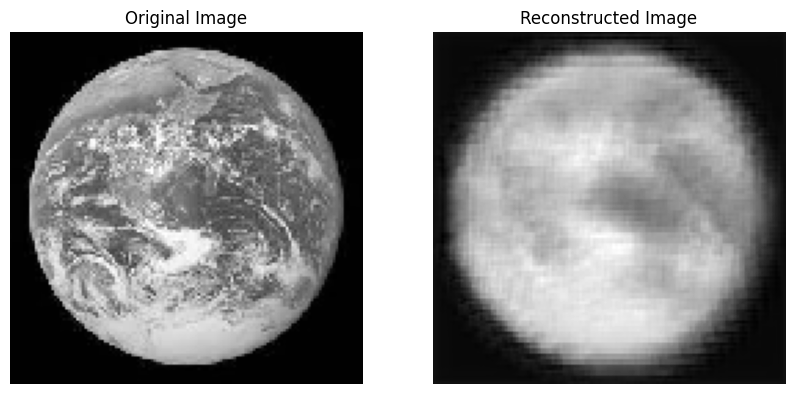

In [58]:
plt.figure(figsize=(10, 5))
# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(decoded_images[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()